In [1]:
import numpy as np
from matplotlib import pyplot as plt 
import glauber 

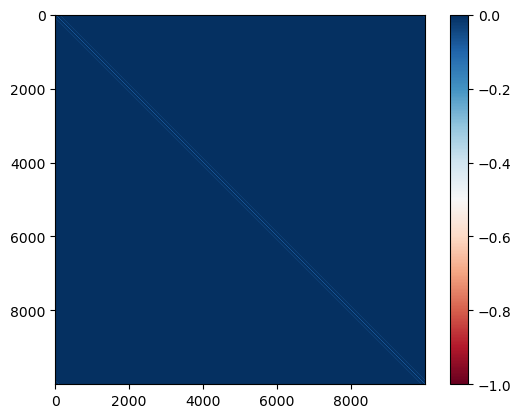

In [43]:
Lx = 100
Ly = 100

spins_initial = glauber.initialize_spins(Lx,Ly,random=False)

J_matrix = glauber.nn_coupling(-1.,Lx,Ly)
#J_matrix = glauber.nn_coupling_random(-1.,0.5,Lx,Ly)

plt.imshow(J_matrix,cmap='RdBu')
plt.colorbar()
plt.show()

nTs = 10
Ts = np.linspace(1.,3.,nTs)

nsweeps = 500
mags = np.zeros((nTs,nsweeps))



In [ ]:
for i in range(nTs):
    spins = glauber.dynamics(spins_initial,nsweeps,J_matrix,Ts[i])
    spins_initial = spins[:,-1]
    mags[i,:] = glauber.calc_mag(spins)

In [ ]:
plt.plot(mags[3,:])
plt.show()
plt.plot(mags[6,:])
plt.show()
plt.plot(mags[9,:])
plt.show()



In [ ]:
plt.plot(Ts,np.mean(mags[:,-100:-1:15],axis=1))
plt.axvline(2./np.log(1.+np.sqrt(2.)),linestyle='dashed',color='gray')
plt.show()

In [ ]:
plt.imshow(spins,cmap='RdBu',aspect=30)
plt.colorbar()
plt.show()

In [ ]:
plt.imshow(spins[:,60].reshape(Lx,Ly),origin='lower',cmap='RdBu')
plt.show()